In [1]:
# IMPORTING LIBRARIES

import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns


In [2]:
# READING CSV FILE

dfs=pd.read_csv('fraudtest.csv')
pd.set_option('display.max_columns',None)
dfs.head(10)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,NY,14816,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,95528,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,57374,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,Morrisdale,PA,16858,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,Prairie Hill,TX,76678,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [3]:
# INFORMATION ABOUT THE DATASET

dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [4]:
# DROPPING IRRELEVANT COLUMNS

df=dfs.drop(['Unnamed: 0','first','last','gender','street','merchant','city_pop','job','dob','state','trans_date_trans_time','city','trans_num'] , axis=1)
df

,cc_num,category,amt,zip,lat,long,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,personal_care,2.86,29209,33.9659,-80.9355,1371816865,33.986391,-81.200714,0
1,3573030041201292,personal_care,29.84,84002,40.3207,-110.4360,1371816873,39.450498,-109.960431,0
2,3598215285024754,health_fitness,41.28,11710,40.6729,-73.5365,1371816893,40.495810,-74.196111,0
3,3591919803438423,misc_pos,60.05,32780,28.5697,-80.8191,1371816915,28.812398,-80.883061,0
4,3526826139003047,travel,3.19,49632,44.2529,-85.0170,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,43.77,63453,40.4931,-91.8912,1388534347,39.946837,-91.333331,0
555715,3556613125071656,kids_pets,111.84,77566,29.0393,-95.4401,1388534349,29.661049,-96.186633,0
555716,6011724471098086,kids_pets,86.88,99323,46.1966,-118.9017,1388534355,46.658340,-119.715054,0
555717,4079773899158,travel,7.99,83643,44.6255,-116.4493,1388534364,44.470525,-117.080888,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cc_num      555719 non-null  int64  
 1   category    555719 non-null  object 
 2   amt         555719 non-null  float64
 3   zip         555719 non-null  int64  
 4   lat         555719 non-null  float64
 5   long        555719 non-null  float64
 6   unix_time   555719 non-null  int64  
 7   merch_lat   555719 non-null  float64
 8   merch_long  555719 non-null  float64
 9   is_fraud    555719 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 42.4+ MB


In [6]:
# COUNT THE VALUES

imbalance=df['is_fraud'].value_counts()
imbalance

0    553574
1      2145
Name: is_fraud, dtype: int64

#  DATA EXPLORATION AND ANALYSIS


In [7]:
# DROPPING OFF THE DUPLICATES

df.drop_duplicates(inplace=True)
df

,cc_num,category,amt,zip,lat,long,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,personal_care,2.86,29209,33.9659,-80.9355,1371816865,33.986391,-81.200714,0
1,3573030041201292,personal_care,29.84,84002,40.3207,-110.4360,1371816873,39.450498,-109.960431,0
2,3598215285024754,health_fitness,41.28,11710,40.6729,-73.5365,1371816893,40.495810,-74.196111,0
3,3591919803438423,misc_pos,60.05,32780,28.5697,-80.8191,1371816915,28.812398,-80.883061,0
4,3526826139003047,travel,3.19,49632,44.2529,-85.0170,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,43.77,63453,40.4931,-91.8912,1388534347,39.946837,-91.333331,0
555715,3556613125071656,kids_pets,111.84,77566,29.0393,-95.4401,1388534349,29.661049,-96.186633,0
555716,6011724471098086,kids_pets,86.88,99323,46.1966,-118.9017,1388534355,46.658340,-119.715054,0
555717,4079773899158,travel,7.99,83643,44.6255,-116.4493,1388534364,44.470525,-117.080888,0


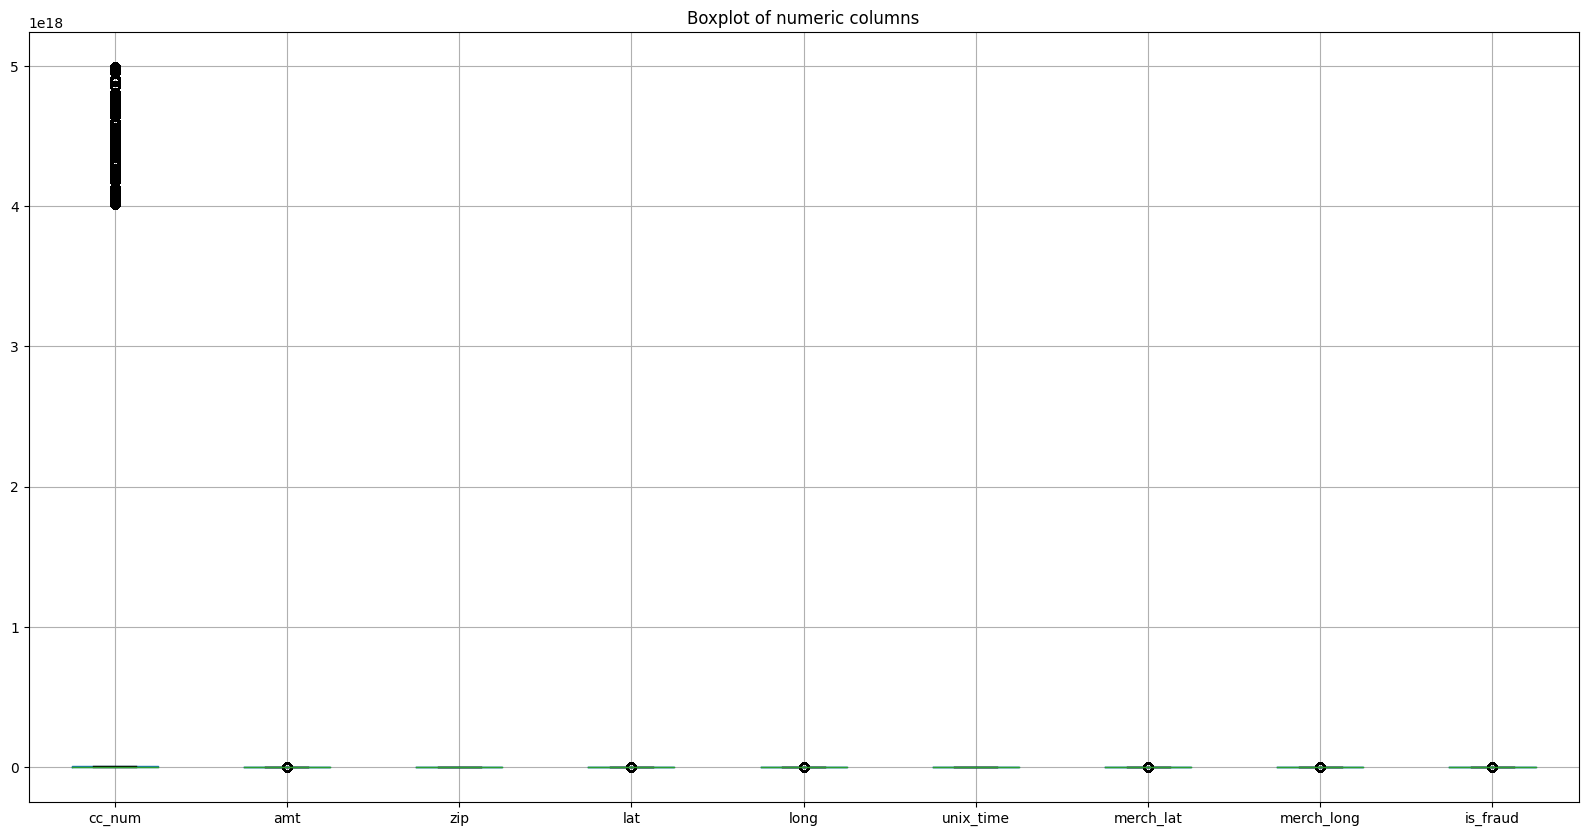

In [8]:
# BOX PLOT TO KNOW THE RELATION BETWEEN THE ATTRIBUTES

numeric_cols = df.select_dtypes(include='number')
subset_df = df[numeric_cols.columns]

# Create a boxplot for the numeric columns of the dataframe
subset_df.boxplot(figsize=(20,10))

# Set the title of the boxplot
plt.title('Boxplot of numeric columns')

# Show the boxplot
plt.show()

In [10]:
# CONVERT STRING TO NUMERIC


newdf = pd.get_dummies(df, columns=['category'], prefix = ['merchant'])
newdf

,cc_num,amt,zip,lat,long,unix_time,merch_lat,merch_long,is_fraud,merchant_entertainment,merchant_food_dining,merchant_gas_transport,merchant_grocery_net,merchant_grocery_pos,merchant_health_fitness,merchant_home,merchant_kids_pets,merchant_misc_net,merchant_misc_pos,merchant_personal_care,merchant_shopping_net,merchant_shopping_pos,merchant_travel
0,2291163933867244,2.86,29209,33.9659,-80.9355,1371816865,33.986391,-81.200714,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,3573030041201292,29.84,84002,40.3207,-110.4360,1371816873,39.450498,-109.960431,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3598215285024754,41.28,11710,40.6729,-73.5365,1371816893,40.495810,-74.196111,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3591919803438423,60.05,32780,28.5697,-80.8191,1371816915,28.812398,-80.883061,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3526826139003047,3.19,49632,44.2529,-85.0170,1371816917,44.959148,-85.884734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,63453,40.4931,-91.8912,1388534347,39.946837,-91.333331,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
555715,3556613125071656,111.84,77566,29.0393,-95.4401,1388534349,29.661049,-96.186633,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555716,6011724471098086,86.88,99323,46.1966,-118.9017,1388534355,46.658340,-119.715054,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555717,4079773899158,7.99,83643,44.6255,-116.4493,1388534364,44.470525,-117.080888,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [11]:
# TO KNOW THE CORRELATIO BETWEEN VARIABLES

x=newdf[['cc_num','amt', 'zip', 'lat', 'long', 
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'merchant_entertainment', 'merchant_food_dining',
       'merchant_gas_transport', 'merchant_grocery_net',
       'merchant_grocery_pos', 'merchant_health_fitness', 'merchant_home',
       'merchant_kids_pets', 'merchant_misc_net', 'merchant_misc_pos',
       'merchant_personal_care', 'merchant_shopping_net',
       'merchant_shopping_pos', 'merchant_travel']]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

                    feature       VIF
0                    cc_num  1.006503
1                       amt  1.000003
2                       zip  1.001707
3                       lat  1.015437
4                      long  5.806458
5                 unix_time  0.000062
6                 merch_lat  1.015332
7                merch_long  5.756413
8                  is_fraud  1.000001
9    merchant_entertainment  1.000004
10     merchant_food_dining  0.999997
11   merchant_gas_transport  1.000007
12     merchant_grocery_net  1.000010
13     merchant_grocery_pos  0.999999
14  merchant_health_fitness  1.000003
15            merchant_home  1.000011
16       merchant_kids_pets  1.000002
17        merchant_misc_net  1.000010
18        merchant_misc_pos  1.000017
19   merchant_personal_care  1.000009
20    merchant_shopping_net  1.000048
21    merchant_shopping_pos  1.000008
22          merchant_travel  1.000002


Text(0.5, 1.0, 'Fraudulent Vs Non-fraudulent Transactions')

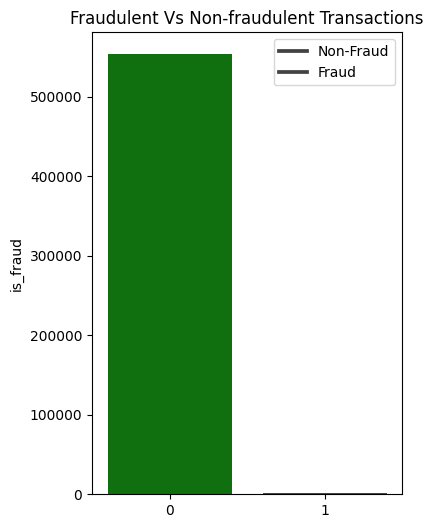

In [11]:
# bar graph shows that the data is highly imbalanced

plt.figure(figsize=(4,6))
sns.barplot(x=df['is_fraud'].value_counts().index,y=df['is_fraud'].value_counts(),color='green')
plt.legend(['Non-Fraud','Fraud'])
plt.title("Fraudulent Vs Non-fraudulent Transactions")

In [12]:

pd.concat(
    [df['amt'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
     df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Non-Fraud Amt Distribution'}),
     df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})], axis=1)

,Row Type,Overall Amt Distribution,Non-Fraud Amt Distribution,Fraud Amt Distribution
0,count,555719.000000,553574.000000,2145.000000
1,mean,69.392810,67.614408,528.356494
2,std,156.745941,152.471931,392.747594
3,min,1.000000,1.000000,1.780000
4,50%,47.290000,47.150000,371.940000
5,95%,193.051000,188.870000,1084.108000
6,99.9%,1572.723500,1575.960200,1311.443760
7,max,22768.110000,22768.110000,1320.920000


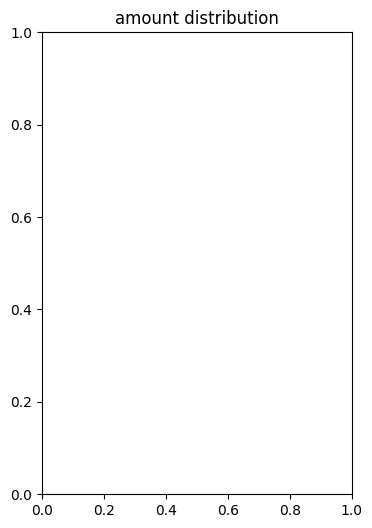

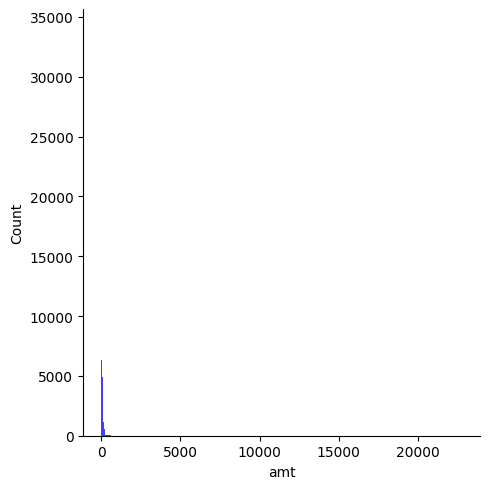

In [7]:
plt.figure(figsize=(4,6))
plt.title("amount distribution")
sns.displot(df['amt'], color= 'blue')

<AxesSubplot: xlabel='category', ylabel='amt'>

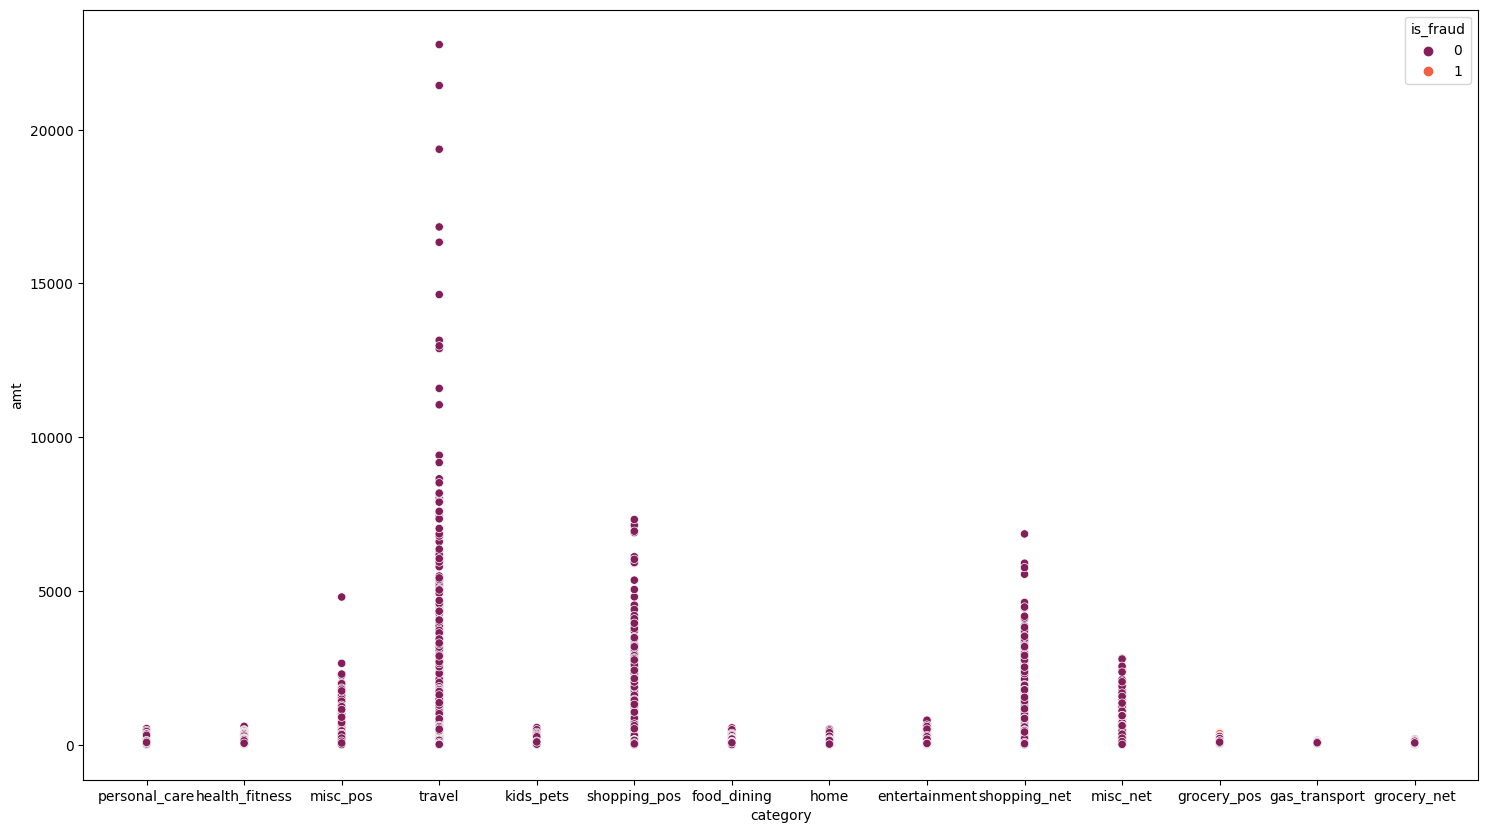

In [15]:
# scatter plot

plt.figure(figsize=(18,10))
sns.scatterplot(x='category', y='amt', hue='is_fraud' ,data = df,palette='rocket') 


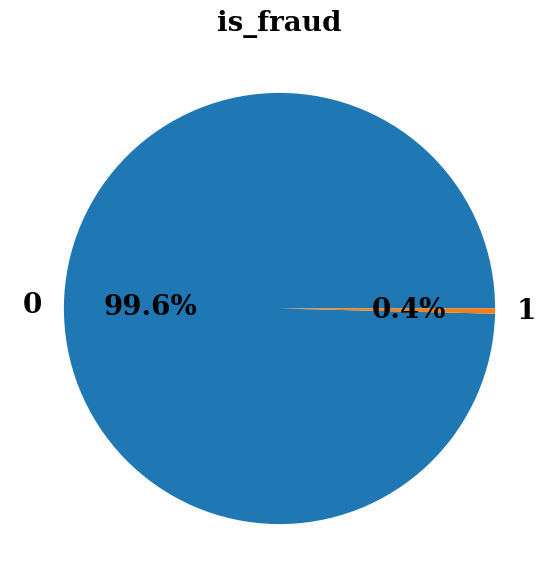

In [16]:
plt.figure(figsize=(10,7)) 
plt.pie(df['is_fraud'].value_counts(), labels=df['is_fraud'].value_counts().index, 
            autopct='%1.1f%%', textprops={ 'fontsize': 20,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('is_fraud', size=20, **hfont) 
plt.show()

#  FEATURE SELECTION


In [ ]:
# FIND THE CORRELATION BETWEEN THE VARIABLES

df.corr()

In [ ]:
# MAKE THE HEATMAP 

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot= True)
plt.title("heatmap",size=10)
plt.yticks(rotations=0)
plt.show()

In [ ]:

from sklearn.feature_selection import mutual_info_regression
x=newdf[['cc_num','amt', 'zip', 'lat', 'long', 
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'merchant_entertainment', 'merchant_food_dining',
       'merchant_gas_transport', 'merchant_grocery_net',
       'merchant_grocery_pos', 'merchant_health_fitness', 'merchant_home',
       'merchant_kids_pets', 'merchant_misc_net', 'merchant_misc_pos',
       'merchant_personal_care', 'merchant_shopping_net',
       'merchant_shopping_pos', 'merchant_travel']]
y=newdf['is_fraud']
def make_mi_scores(x, y):
    mi_scores = mutual_info_regression(x, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(newdf, y)





In [ ]:

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores



#  INDEPENDENT AND DEPENDENT VARIABLES

In [17]:
# DEFINE X AND Y

x = newdf.drop("is_fraud", axis=1) #independent
y = pd.DataFrame(newdf["is_fraud"])  # dependent

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, X_test = np.split(x, [int(0.7 * len(x)), int(0.85 * len(x))]) # Split the data into training, validation, and test sets
y_train, y_val, y_test = np.split(y, [int(0.7 * len(y)), int(0.85 * len(y))])



In [19]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

    
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0 )

In [20]:
# DEALING OF IMBALANCED DATASET

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

X_resampled, y_resampled = method.fit_resample(X_train, y_train)
y_resampled.value_counts(),X_resampled.value_counts()


(is_fraud
 0           442871
 1           442871
 dtype: int64,
 cc_num               amt          zip    lat      long       unix_time   merch_lat  merch_long   merchant_entertainment  merchant_food_dining  merchant_gas_transport  merchant_grocery_net  merchant_grocery_pos  merchant_health_fitness  merchant_home  merchant_kids_pets  merchant_misc_net  merchant_misc_pos  merchant_personal_care  merchant_shopping_net  merchant_shopping_pos  merchant_travel
 676275912597         957.900000   49629  44.8955  -85.4082   1385595299  45.451729  -85.966786   0                       0                     0                       0                     0                     0                        0              0                   0                  0                  0                       1                      0                      0                  79
 30199621383748       1116.060000  75452  33.4044  -96.2238   1375752191  33.767248  -96.867737   0                       0              

# REGRESSION TECHNIQUES


#  OVERSAMPLING SMOTE

In [21]:
#SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

X_resampled, y_resampled = method.fit_resample(X_train, y_train)
y_resampled.value_counts(),X_resampled.value_counts()


(is_fraud
 0           442871
 1           442871
 dtype: int64,
 cc_num               amt          zip    lat      long       unix_time   merch_lat  merch_long   merchant_entertainment  merchant_food_dining  merchant_gas_transport  merchant_grocery_net  merchant_grocery_pos  merchant_health_fitness  merchant_home  merchant_kids_pets  merchant_misc_net  merchant_misc_pos  merchant_personal_care  merchant_shopping_net  merchant_shopping_pos  merchant_travel
 2242176657877538     868.090000   38668  34.6323  -89.8855   1387750687  34.091227  -90.390612   0                       0                     0                       0                     0                     0                        0              0                   0                  0                  0                       0                      1                      0                  80
 376445266762684      882.830000   69165  41.1558  -101.1360  1375927667  42.010574  -102.108069  0                       0              

In [27]:

import sklearn.linear_model 
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
# #LOGISTIC REGRESSION

# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(random_state=42)
# lr.fit(X_resampled, y_resampled)
# y_pred=lr.predict(X_test)


In [30]:
#CLASSIFICATION REPORT WITH TESTING DATA

print('Classification report for testing dataset:')
print(classification_report(y_test, y_pred, zero_division=1))

Classification report for testing dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83272
           1       1.00      0.00      0.00        86

    accuracy                           1.00     83358
   macro avg       1.00      0.50      0.50     83358
weighted avg       1.00      1.00      1.00     83358



In [33]:
#DECISION TREE REGRESSOR

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dec_tree_reg=DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_resampled,y_resampled.values)
y_pred=dec_tree_reg.predict(X_test)
error=np.sqrt(mean_squared_error(y_test,y_pred))
error

0.059891053307428006

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
pip install keras


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
y_resampled.value_counts() , X_resampled.value_counts()

In [ ]:
newdf.info()

# LSTM 

In [25]:
# from sklearn.preprocessing import StandardScaler
# # Scale the input data using StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_resampled)
# X_test_scaled = scaler.transform(X_test)
# X_val_scaled = scaler.transform(X_val)

# # Reshape the input data for LSTM
# X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
# X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/2
13840/13840 [==============================] - 181s 13ms/step - loss: 0.0921 - accuracy: 0.9721 - val_loss: 0.0482 - val_accuracy: 0.9933
Epoch 2/2
3474/3474 [==============================] - 13s 4ms/step


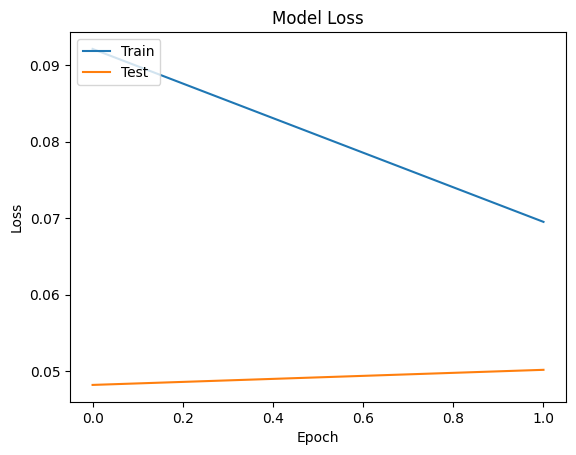

In [29]:
# # Train the model
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping=EarlyStopping(monitor='val_loss',patience=5)
# history=model.fit(X_train_reshaped, y_resampled, epochs=2, batch_size=64, validation_data=(X_val_scaled, y_val),
#                  callbacks=[early_stopping])
# # Make predictions
# predictions = model.predict(X_test_reshaped)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

3474/3474 [==============================] - 14s 4ms/step


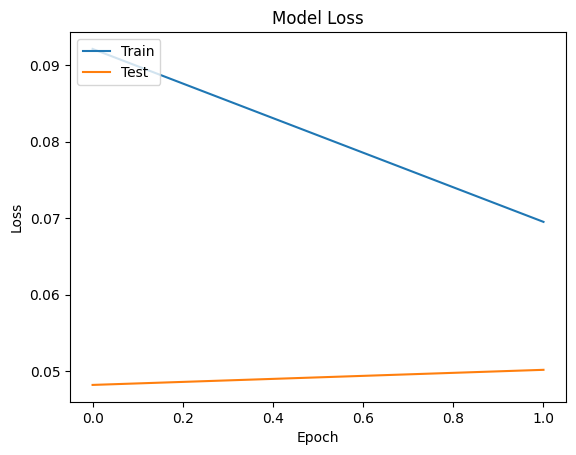

In [30]:
# predictions = model.predict(X_test_reshaped)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [32]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# predictions = (predictions> 0.5).astype(int)  # Convert probabilities to binary predictions
# y_true = y_test.astype(int)

# # Generate confusion matrix
# cm = confusion_matrix(y_true,predictions)
# print("Confusion Matrix:")
# print(cm)
# # Generate classification report
# report = classification_report(y_true, predictions)
# print("Classification Report:")
# print(report)

Confusion Matrix:
[[109661   1042]
 [    85    356]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    110703
           1       0.25      0.81      0.39       441

    accuracy                           0.99    111144
   macro avg       0.63      0.90      0.69    111144
weighted avg       1.00      0.99      0.99    111144



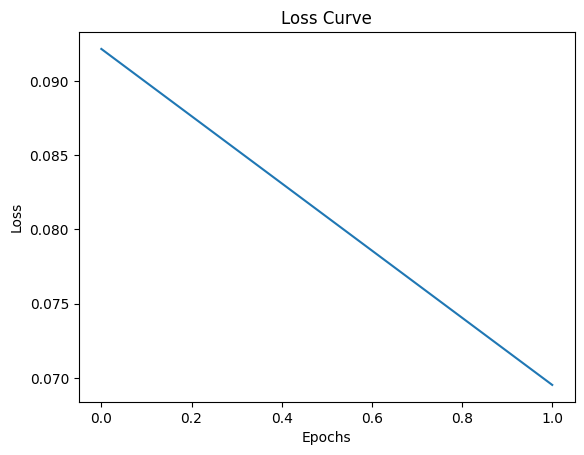

In [33]:
# import matplotlib.pyplot as plt

# # Train the LSTM model and store the history
# #history = model.fit(X_train_reshaped, y_resampled, epochs=5, batch_size=32)

# # Plot the loss curve
# plt.plot(history.history['loss'])
# plt.title('Loss Curve')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show()


In [36]:
# from sklearn.metrics import precision_recall_curve, auc
# precision, recall, thresholds = precision_recall_curve(y_test, predictions)
# auprc = auc(recall, precision)
# plt.plot(recall, precision, label='LSTM (AUPRC = {:.3f})'.format(auprc))
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend()
# plt.show()





In [37]:
# from sklearn.metrics import roc_curve, auc
# y_pred = model.predict(X_test_reshaped)
# # y_pred = y_pred.flatten()  # Flatten the predictions to 1D array
# # y_true = y_test.flatten()  # Flatten the true labels to 1D array

# fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# # Calculate AUC
# roc_auc = auc(fpr, tpr)
# print("AUC:", roc_auc)

# # Plot ROC curve
# plt.figure()
# plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.show()

In [38]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')  # diagonal line for random classifier
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc='lower right')
# plt.show()

In [37]:
X_resampled.shape

(885742, 22)

# LSTM WITH ONLINE FOREST

In [22]:


from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.preprocessing import StandardScaler


# Scale the input data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)
X_val_scaled=scaler.transform(X_val)

# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Train LSTM model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_reshaped, y_resampled, epochs=4, batch_size=32)

# Combine LSTM predictions with original features
lstm_predictions = model.predict(X_test_reshaped)

Epoch 1/4
27680/27680 [==============================] - 244s 9ms/step - loss: 0.1176 - accuracy: 0.9625
Epoch 2/4
27680/27680 [==============================] - 226s 8ms/step - loss: 0.0555 - accuracy: 0.9807
Epoch 3/4
27680/27680 [==============================] - 223s 8ms/step - loss: 0.0502 - accuracy: 0.9823
Epoch 4/4
3474/3474 [==============================] - 19s 5ms/step


In [27]:
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], 1))

lstm_x_val= model.predict(X_val_reshaped)

2605/2605 [==============================] - 10s 4ms/step


In [25]:

from skmultiflow.meta import AdaptiveRandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
o_rf = AdaptiveRandomForestClassifier()

combined_features = np.concatenate((X_test_scaled, lstm_predictions), axis=1)

# Convert the list to a numpy array
# Online learning with random forest
for i in range(len(combined_features)):
    x_batch = combined_features[i].reshape(1, -1)
    y_batch=y_test.iloc[i]
   
    # Update online random forest with the current batch
    o_rf.partial_fit(x_batch, y_batch, classes=[0, 1])



In [29]:
x_val_new = np.concatenate((X_val_scaled,lstm_x_val), axis=1)

In [31]:

# Make predictions with the combined model
ensemble_predictions = o_rf.predict(x_val_new)

# Evaluate performance
accuracy = accuracy_score(y_val,ensemble_predictions)
precision = precision_score(y_val,ensemble_predictions)
recall = recall_score(y_val,ensemble_predictions)
f1 = f1_score(y_val,ensemble_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9974087670049665
Precision: 0.8073394495412844
Recall: 0.31095406360424027
F1-score: 0.4489795918367347


THIS WAS ACHIEVED BY OUR MODEL.Ensemble model's accuracy goal should be to strike a balance between correctly identifying as many fraud cases as possibl, while keeping the false positive rate reasonably low (high precision).

In [35]:
from sklearn.metrics import classification_report

report=classification_report(y_val,ensemble_predictions)
print("classification report")
print(report)

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83075
           1       0.81      0.31      0.45       283

    accuracy                           1.00     83358
   macro avg       0.90      0.66      0.72     83358
weighted avg       1.00      1.00      1.00     83358



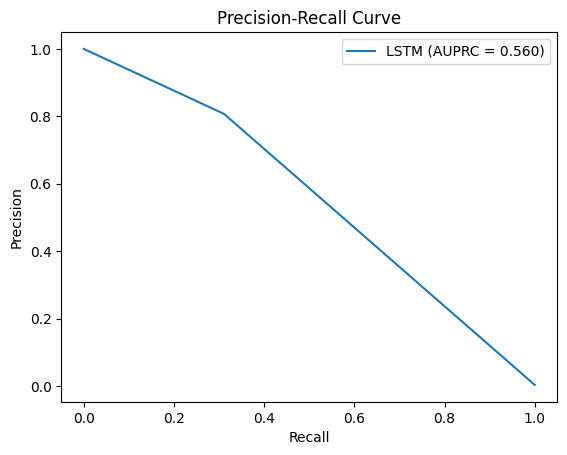

In [34]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = precision_recall_curve(y_val, ensemble_predictions)
auprc = auc(recall, precision)
plt.plot(recall, precision, label='LSTM (AUPRC = {:.3f})'.format(auprc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

